In [2]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"



# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras


In [3]:



# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3 as myModel
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [5]:
model = myModel(weights="imagenet")

In [8]:
img_path ='_MG_7077.JPG'

img.shape <class 'PIL.Image.Image'>


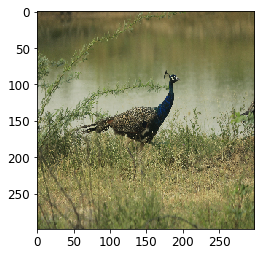

In [9]:
img = image.load_img(img_path, target_size=(299, 299))


print ("img.shape", type(img))
plt.imshow(np.asarray(img)) #To enable showing PIL image

In [ ]:
#Converts a PIL image to np array
x = image.img_to_array(img)
print ("x.shape", x.shape)

#We have to feed an array of images 
x= np.array([x])
#x = np.expand_dims(x, axis=0)
print ("x expand dims shape", x.shape)

#Preprocess the color channels for the specific model
x = preprocess_input(x)
print ("x expand preprocess", x.shape)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

x.shape (299, 299, 3)
x expand dims shape (1, 299, 299, 3)
x expand preprocess (1, 299, 299, 3)
